# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['amderma',
 'biu',
 'mataura',
 'hilo',
 'nikolskoye',
 'butaritari',
 'kashi',
 'mitzic',
 'bell ville',
 'castro',
 'avera',
 'arman',
 'magadan',
 'attawapiskat',
 'ponta do sol',
 'carnarvon',
 'hermanus',
 'morondava',
 'ushuaia',
 'norman wells',
 'narsaq',
 'lukulu',
 'busselton',
 'kuytun',
 'kilindoni',
 'vaini',
 'thompson',
 'venado',
 'zabolottya',
 'basco',
 'severo-kurilsk',
 'high level',
 'bredasdorp',
 'saint george',
 'orotukan',
 'klaksvik',
 'tuatapere',
 'punta arenas',
 'kasongo',
 'lysva',
 'khatanga',
 'vila velha',
 'kapaa',
 'belfast',
 'taolanaro',
 'komsomolets',
 'alugan',
 'port elizabeth',
 'harnosand',
 'tezu',
 'qaanaaq',
 'lindenberg',
 'mahebourg',
 'port alfred',
 'bambous virieux',
 'mecca',
 'nabire',
 'atuona',
 'sangin',
 'hobart',
 'cherskiy',
 'souillac',
 'molepolole',
 'albany',
 'mayo',
 'hithadhoo',
 'bethel',
 'noumea',
 'illoqqortoormiut',
 'jamestown',
 'rikitea',
 'sechura',
 'new norfolk',
 'daxian',
 'port hardy',
 'lagoa',
 'sorong'

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
#Create lists to hold data
temp_max = []
lat = []
lon = []
clouds = []
wind_speed = []
humidity = []
date = []
country = []
name = []
counter = 1
#Print commands
print("Beginning Data Retrieval")
print("----------------------------------------")
# Loop through the list of cities and perform a request for data on each
for city in cities:
      
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try:
        temp_max.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        clouds.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        print(f"Processing Record {counter} | {city}")
    except KeyError:
                print("City not found. Skipping...")
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")


Beginning Data Retrieval
----------------------------------------
City not found. Skipping...
Processing Record 3 | biu
Processing Record 4 | mataura
Processing Record 5 | hilo
Processing Record 6 | nikolskoye
Processing Record 7 | butaritari
City not found. Skipping...
Processing Record 9 | mitzic
Processing Record 10 | bell ville
Processing Record 11 | castro
Processing Record 12 | avera
Processing Record 13 | arman
Processing Record 14 | magadan
City not found. Skipping...
Processing Record 16 | ponta do sol
Processing Record 17 | carnarvon
Processing Record 18 | hermanus
Processing Record 19 | morondava
Processing Record 20 | ushuaia
Processing Record 21 | norman wells
Processing Record 22 | narsaq
Processing Record 23 | lukulu
Processing Record 24 | busselton
Processing Record 25 | kuytun
Processing Record 26 | kilindoni
Processing Record 27 | vaini
Processing Record 28 | thompson
Processing Record 29 | venado
City not found. Skipping...
Processing Record 31 | basco
Processing Rec

Processing Record 255 | lata
Processing Record 256 | vila franca do campo
Processing Record 257 | isangel
Processing Record 258 | faanui
Processing Record 259 | puerto ayora
Processing Record 260 | touros
Processing Record 261 | goderich
Processing Record 262 | ilo
Processing Record 263 | rawson
Processing Record 264 | brae
Processing Record 265 | mayumba
Processing Record 266 | ruwi
Processing Record 267 | porto seguro
Processing Record 268 | alofi
Processing Record 269 | bar harbor
Processing Record 270 | perelyub
City not found. Skipping...
Processing Record 272 | caluquembe
Processing Record 273 | guilin
Processing Record 274 | san patricio
City not found. Skipping...
Processing Record 276 | byron bay
Processing Record 277 | malangwa
Processing Record 278 | batemans bay
Processing Record 279 | davila
Processing Record 280 | nantucket
City not found. Skipping...
Processing Record 282 | mlonggo
Processing Record 283 | luderitz
Processing Record 284 | namatanai
Processing Record 285 |

Processing Record 508 | guiratinga
Processing Record 509 | katobu
Processing Record 510 | clyde river
City not found. Skipping...
City not found. Skipping...
Processing Record 513 | gilgit
Processing Record 514 | annau
Processing Record 515 | quang ngai
Processing Record 516 | venice
Processing Record 517 | conceicao do araguaia
Processing Record 518 | basoko
Processing Record 519 | grindavik
City not found. Skipping...
Processing Record 521 | pitanga
Processing Record 522 | mugur-aksy
City not found. Skipping...
Processing Record 524 | rocha
Processing Record 525 | cidreira
Processing Record 526 | saldanha
Processing Record 527 | lima
Processing Record 528 | kulhudhuffushi
Processing Record 529 | la palma
Processing Record 530 | muhos
Processing Record 531 | iracoubo
Processing Record 532 | imeni poliny osipenko
Processing Record 533 | gushikawa
Processing Record 534 | mangrol
Processing Record 535 | nchelenge
Processing Record 536 | menemen
Processing Record 537 | mahibadhoo
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
#Create library from lists
weather = { "City": name, "Cloudiness": clouds, "Country": country, "Date": date, 
          "Humidity": humidity, "Lat": lat, "Lon": lon, "Max Temp": temp_max, 
          "Wind Speed": wind_speed}
#Create a dataframe with data and export to .csv
weather_data = pd.DataFrame(weather)
weather_data.to_csv('weather.csv')
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Biu,8,NG,1554515327,37,10.61,12.19,73.25,4.41
1,Mataura,0,NZ,1554513607,50,-46.19,168.86,57.00,4.00
2,Hilo,75,US,1554515054,61,19.71,-155.08,80.60,12.75
3,Nikolskoye,0,RU,1554514839,68,59.70,30.79,36.00,2.62
4,Butaritari,92,KI,1554515096,100,3.07,172.79,80.81,12.68


{'cod': '404', 'message': 'city not found'}


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

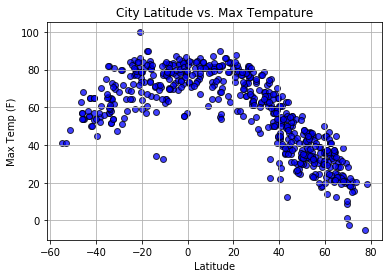

In [23]:
#Create Scatterplot
plt.scatter(lat, temp_max, marker="o", alpha = 0.75, facecolors="blue", edgecolors="black")
#Create Labels
plt.title("City Latitude vs. Max Tempature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()
# Save Figure
plt.savefig("MaxTemp.png")

#### Latitude vs. Humidity Plot

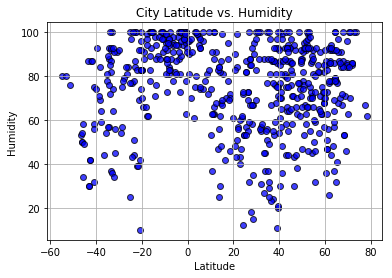

In [24]:
#Create Scatterplot
plt.scatter(lat, humidity, marker="o", alpha = 0.75, facecolors="blue", edgecolors="black")
#Create Labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
# Save Figure
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

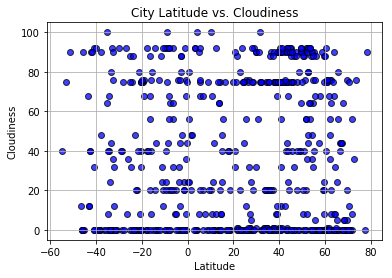

In [25]:
#Create Scatterplot
plt.scatter(lat, clouds, marker="o", alpha = 0.75, facecolors="blue", edgecolors="black")
#Create Labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
# Save Figure
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

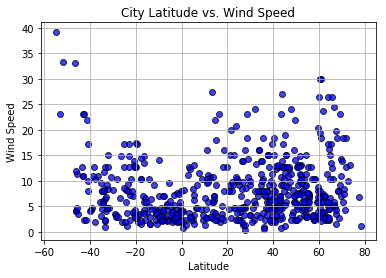

In [26]:
#Create Scatterplot
plt.scatter(lat, wind_speed, marker="o", alpha = 0.75, facecolors="blue", edgecolors="black")
#Create Labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
# Save Figure
plt.savefig("Wind Speed.png")

Observations
1. There is an observable trend on wind speed where the majority of cities are between 0 to 10
2. The majority of cities are in the 80 to 100 humidity
3. Cities with similar latitu